In [3]:
import pandas as pd

data = pd.read_csv('./datasets/WASSA22_23_hope.tsv', sep='\t')
data

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,iri_fantasy,iri_empathatic_concern,fear,sadness,disgust,surprise,anger,neutral,hope,joy
0,5.667000,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,1,0,0,0,0,0,0
1,4.833000,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,1,0,0,0,0,0,0
2,5.333000,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,0,0,0,0,1,0,0
3,4.167000,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,1,0,0,0,0,0,0,0
4,5.333000,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,2.333333,2.750,The entirety of this situation is cause for al...,Fear/Hope,2.0,7.0,1.0,38.0,42000.0,7.00,...,2.571,3.857,1,0,0,0,0,0,1,0
2271,2.333333,2.750,This entire circumstance is deeply concerning....,Fear/Hope,2.0,7.0,1.0,38.0,42000.0,7.00,...,2.571,3.857,1,0,0,0,0,0,1,0
2272,1.000000,2.000,"The article is deeply unsettling, and my since...",Anger/Hope,1.0,6.0,1.0,29.0,85000.0,6.75,...,4.143,4.643,0,0,0,0,1,0,1,0
2273,1.000000,2.000,"This article is incredibly distressing, and I ...",Anger/Hope,1.0,6.0,1.0,29.0,85000.0,6.75,...,4.143,4.643,0,0,0,0,1,0,1,0


In [6]:
# convert to lowercase data['emotion']
data['emotion'] = data['emotion'].str.lower()

<AxesSubplot:title={'center':'Number of essays per emotion for training data'}, xlabel='Emotion', ylabel='Number of essays'>

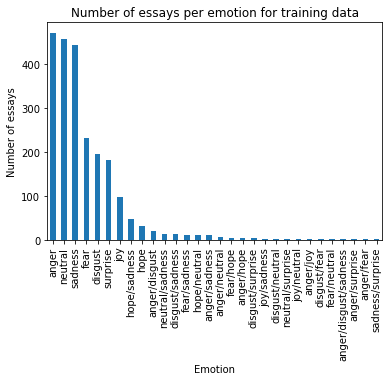

In [7]:
data['emotion'].value_counts().plot(kind='bar', title='Number of essays per emotion for training data', xlabel='Emotion', ylabel='Number of essays')

In [8]:
emotions = set()
for perceived_emotion in data['emotion'].unique():
	for emotion in perceived_emotion.split('/'):
		emotions.add(emotion.lower())
emotions

{'anger', 'disgust', 'fear', 'hope', 'joy', 'neutral', 'sadness', 'surprise'}

In [9]:
for emotion in emotions:
    data[emotion] = data["emotion"].str.lower().str.contains(emotion).astype(int)

/var/folders/24/k023d_r17kq_q1b7bj27y7t80000gn/T/ipykernel_5298/941881292.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[emotions].sum().plot(kind='bar')


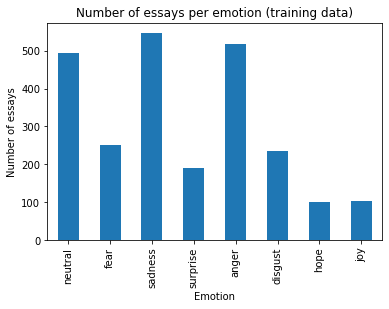

In [11]:
import matplotlib.pyplot as plt
data[emotions].sum().plot(kind='bar')
plt.title('Number of essays per emotion (training data)')
plt.xlabel('Emotion')
plt.ylabel('Number of essays')
plt.show()

In [13]:
from utils import EmotionsLabelEncoder
import numpy as np

label_encoder = EmotionsLabelEncoder()
label_encoder.fit(data.emotion)
y = label_encoder.encode(data.emotion)
inverse_n_samples = 1 / np.sum(y, axis=0)
sum_inverses = sum(inverse_n_samples)
weights = inverse_n_samples / sum_inverses
weights